In [37]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the file paths for the datasets
data_dir = "~/Documents/GitHub/Cvirg_Pmarinus_RNAseq/data/rnaseq_gene_counts"
metadata_file = "~/Documents/GitHub/Cvirg_Pmarinus_RNAseq/data/merged_metadata.csv"
file_names = [
    "salmon.merged.gene_counts_length_scaled_dataset1.tsv",
    "salmon.merged.gene_counts_length_scaled_dataset2.tsv",
    "salmon.merged.gene_counts_length_scaled_dataset3.tsv",
    "salmon.merged.gene_counts_length_scaled_dataset4.tsv",
    "salmon.merged.gene_counts_length_scaled_dataset5.tsv",
]

# Load and merge RNA-seq datasets
dfs = []
for file_name in file_names:
    file_path = os.path.join(data_dir, file_name)
    df = pd.read_csv(file_path, sep="\t")  # Assuming tab-separated files
    dfs.append(df)

merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=["gene_id", "gene_name"], how="outer")
    



In [38]:
merged_df.head()

,gene_id,gene_name,SRX18040004,SRX18040005,SRX18040006,SRX18040007,SRX18040008,SRX18040009,SRX18040010,SRX18040011,...,SRX7172570,SRX7172571,SRX7172572,SRX7172573,SRX7172574,SRX7172575,SRX7172576,SRX7172577,SRX7172578,SRX7172579
0,LOC111099029,LOC111099029,31.735289,1.011466,10.953003,2.002912,1.004307,1.011129,12.050562,1.016522,...,21.366406,40.282029,79.198957,3.937919,83.938803,56.655997,82.208451,7.129286,46.970308,80.080939
1,LOC111099030,LOC111099030,42.715859,4.895107,1.005166,723.725054,0.990593,47.323408,9.815896,320.938957,...,264.862754,345.409815,411.585440,0.000000,5.691835,5.746343,11.265166,8.427190,0.935735,112.137838
2,LOC111099031,LOC111099031,0.000000,0.000000,0.000000,1.007965,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,LOC111099032,LOC111099032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,LOC111099033,LOC111099033,134.457744,1.960379,24.750646,124.544902,76.080973,73.338361,40.597674,15.552135,...,274.562677,59.075392,77.931387,24.613760,116.432148,21.295947,252.288181,39.028774,116.103294,83.286857


In [39]:
# Filter genes with low expression (e.g., total counts < 10 across all samples)
gene_ids = merged_df['gene_id']
count_data = merged_df.drop(columns=['gene_id','gene_name'])
# Replace NaN values with zeros
count_data = count_data.fillna(0)
count_data = count_data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
filtered_data = count_data[count_data.max(axis=1) >= 10]




In [40]:
filtered_data.head()

,SRX18040004,SRX18040005,SRX18040006,SRX18040007,SRX18040008,SRX18040009,SRX18040010,SRX18040011,SRX18040012,SRX18040013,...,SRX7172570,SRX7172571,SRX7172572,SRX7172573,SRX7172574,SRX7172575,SRX7172576,SRX7172577,SRX7172578,SRX7172579
0,31.735289,1.011466,10.953003,2.002912,1.004307,1.011129,12.050562,1.016522,0.000000,3.016988,...,21.366406,40.282029,79.198957,3.937919,83.938803,56.655997,82.208451,7.129286,46.970308,80.080939
1,42.715859,4.895107,1.005166,723.725054,0.990593,47.323408,9.815896,320.938957,4.847883,863.820286,...,264.862754,345.409815,411.585440,0.000000,5.691835,5.746343,11.265166,8.427190,0.935735,112.137838
4,134.457744,1.960379,24.750646,124.544902,76.080973,73.338361,40.597674,15.552135,16.992560,66.358636,...,274.562677,59.075392,77.931387,24.613760,116.432148,21.295947,252.288181,39.028774,116.103294,83.286857
5,19.454785,3.010887,39.027207,19.080168,19.965855,34.428810,53.587738,22.498907,15.708446,0.000000,...,7.774010,7.417112,18.849863,2.612551,9.973571,15.583409,12.916126,6.752245,15.607856,7.091308
6,32.059393,6.502988,21.745669,22.212159,10.286375,41.271623,109.531385,38.755923,15.358759,44.879734,...,20.091456,55.669246,71.816716,66.492233,152.425472,66.131284,25.149181,65.248479,10.648351,18.220584


In [41]:
# Apply log2 transformation with a pseudocount of 1
log_transformed_data = np.log2(filtered_data + 1.1)

# Combine gene IDs with log-transformed data
log_transformed_df = pd.concat([gene_ids, log_transformed_data], axis=1)


In [42]:
# Subset the data for a set of 9 genes
genes_of_interest = [
    "LOC111125640", "LOC111132066", "LOC111137561", "LOC111103931", "LOC111119721",
    "LOC111135561", "LOC111135567", "LOC111099849", "LOC111106049"
]  # Replace with your actual gene IDs
subset_df = log_transformed_df[log_transformed_df['gene_id'].isin(genes_of_interest)]



In [43]:
print(subset_df)

            gene_id  SRX18040004  SRX18040005  SRX18040006  SRX18040007  \
649    LOC111099849     8.243257     7.071950     7.769588     1.424502   
4661   LOC111103931     9.122391     5.591429     6.930486     6.172798   
6711   LOC111106049    10.905842     9.990566    10.240395    12.132479   
20012  LOC111119721     5.099654     1.326691     6.419981     2.352150   
25766  LOC111125640     5.684568     4.131672     6.269820     3.261702   
31898  LOC111132066    12.222658    10.799041    11.767108    12.223567   
35342  LOC111135561     8.905282     7.428384     7.944739     8.630864   
35348  LOC111135567    10.147450     9.442033     9.298355    11.437149   
37313  LOC111137561     7.386085     3.082978     5.368799     5.672706   

       SRX18040008  SRX18040009  SRX18040010  SRX18040011  SRX18040012  ...  \
649       8.210394     8.984044     8.996838     7.752519     7.751533  ...   
4661      6.696969     3.552259     7.011459     5.614736     5.278367  ...   
6711     10.

In [44]:
# Drop the 'gene_id' column for PCA
pca_data = subset_df.drop(columns=['gene_id']).T  # Transpose for PCA (samples as rows)
print(pca_data)


                649       4661       6711      20012     25766      31898  \
SRX18040004  8.243257  9.122391  10.905842  5.099654  5.684568  12.222658   
SRX18040005  7.071950  5.591429   9.990566  1.326691  4.131672  10.799041   
SRX18040006  7.769588  6.930486  10.240395  6.419981  6.269820  11.767108   
SRX18040007  1.424502  6.172798  12.132479  2.352150  3.261702  12.223567   
SRX18040008  8.210394  6.696969  10.486655  0.137504  5.607525  12.522281   
...               ...       ...        ...       ...       ...        ...   
SRX7172575   8.360581  7.946693  10.711117  5.414372  6.454603  11.005523   
SRX7172576   8.537405  8.682260  10.284782  8.072975  5.929908   9.778152   
SRX7172577   8.490751  8.942708  10.432015  9.499425  6.904381  10.471941   
SRX7172578   0.137504  8.708844   9.716399  9.001718  5.304129   9.635478   
SRX7172579   7.214641  7.187567   9.215586  7.915016  4.820919  10.468228   

                35342      35348     37313  
SRX18040004  8.905282  10.1474

In [45]:
print(pca_data[pca_data.isna().any(axis=1)])

Empty DataFrame
Columns: [649, 4661, 6711, 20012, 25766, 31898, 35342, 35348, 37313]
Index: []


In [46]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_data)



In [56]:
metadata.head()

,infection,BREED,treatment,Trait,tissue,collection_time,Collection_Date,BioProject
Experiment,,,,,,,,
SRX18040064,NaN,ABC_VIMS_Family_2017084,Dose 1x10^6,tolerant,mantle,NaN,6/20/2018,PRJNA894694
SRX18040063,NaN,ABC_VIMS_Family_2017084,Control,tolerant,mantle,NaN,6/20/2018,PRJNA894694
SRX18040062,NaN,ABC_VIMS_Family_2017120,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694
SRX18040061,NaN,ABC_VIMS_Family_2017120,Dose 1x10^8,sensitive,mantle,NaN,6/20/2018,PRJNA894694
SRX18040060,NaN,ABC_VIMS_Family_2017090,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694


In [59]:
# Load metadata
metadata = pd.read_csv(metadata_file)

# Ensure metadata matches the PCA data
metadata = metadata.set_index('Experiment')  # Assuming 'sample' column matches pca_data.index
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=pca_data.index)
pca_df = pd.merge(metadata, pca_df, left_index=True, right_index=True, how="outer") # Merge PCA results with metadata

pca_df.head()

,infection,BREED,treatment,Trait,tissue,collection_time,Collection_Date,BioProject,PC1,PC2
SRX13037862,NaN,NaN,Injection,tolerant,gill,3.0,NaN,PRJNA778545,11.032057,-0.187272
SRX13037863,NaN,NaN,Injection,tolerant,gill,24.0,NaN,PRJNA778545,10.739455,-1.196543
SRX13037864,NaN,NaN,Control,tolerant,gill,3.0,NaN,PRJNA778545,9.820605,-0.580399
SRX13037865,NaN,NaN,Control,tolerant,gill,24.0,NaN,PRJNA778545,10.910508,-1.532184
SRX13037866,NaN,NaN,Control,tolerant,gill,0.0,NaN,PRJNA778545,10.974049,-1.353560


In [65]:
pca_df['treatment'].unique()

array(['Injection', 'Control', 'Dose 1x10^6', 'Dose 1x10^7',
       'Dose 1x10^8', 'Injected', 'field', 'Fed'], dtype=object)

<Figure size 576x432 with 0 Axes>

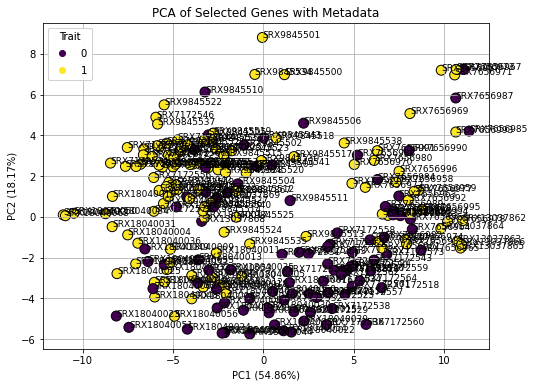

In [66]:
# Save the PCA table with metadata
#output_table_path = os.path.join(data_dir, "pca_with_metadata.tsv")
#pca_df.to_csv(output_table_path, sep="\t")
#print(f"PCA table with metadata saved to {output_table_path}")

# Create a PCA plot with metadata
# Convert 'BioProject' to numeric codes
pca_df['Trait_numeric'] = pca_df['Trait'].astype('category').cat.codes
# Define shapes for Metadata categories
#shapes = ['o', 's', 'D', '^', 'v']  # Circle, square, diamond, triangle-up, triangle-down
#metadata_categories = pca_df['treatment'].unique()
#shape_map = {category: shapes[i] for i, category in enumerate(metadata_categories)}


plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    #marker=shape_map[metadata_categories],
    c=pca_df['Trait_numeric'],  # Color by 'trait'
cmap='viridis', edgecolor='k', s=100)
plt.title("PCA of Selected Genes with Metadata")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.grid(True)

# Annotate points with sample names
for i, row in pca_df.iterrows():
    plt.text(row['PC1'], row['PC2'], row.name, fontsize=9)

# Add a legend for traits
legend1 = plt.legend(*scatter.legend_elements(), title="Trait")
plt.gca().add_artist(legend1)

# Save the PCA plot
#output_plot_path = os.path.join(data_dir, "pca_plot_with_metadata.png")
#plt.savefig(output_plot_path)
plt.show()

#print(f"PCA plot with metadata saved to {output_plot_path}")

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

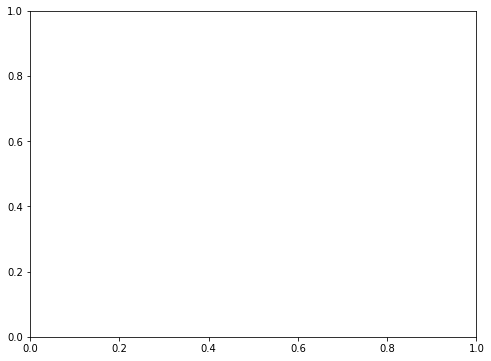

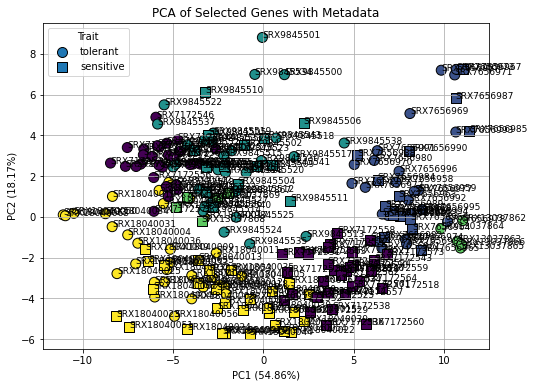

In [72]:
# Save the PCA table with metadata
#output_table_path = os.path.join(data_dir, "pca_with_metadata.tsv")
#pca_df.to_csv(output_table_path, sep="\t")
#print(f"PCA table with metadata saved to {output_table_path}")

# Create a PCA plot with metadata
# Convert 'BioProject' to numeric codes
pca_df['BioProject_numeric'] = pca_df['BioProject'].astype('category').cat.codes
# Define shapes for Metadata categories
shapes = ['o', 's']  # Circle, square, diamond, triangle-up, triangle-down
metadata_categories = pca_df['Trait'].unique()
shape_map = {category: shapes[i] for i, category in enumerate(metadata_categories)}


# Plot each Trait category with a different shape
for trait in metadata_categories:
    subset = pca_df[pca_df['Trait'] == trait]
    plt.scatter(
        subset['PC1'], subset['PC2'],
        label=trait,
        marker=shape_map[trait],  # Use shape from shape_map
        c=subset['BioProject_numeric'],  # Color by BioProject
        cmap='viridis',
        edgecolor='k',
        s=100
    )

# Add title and labels
plt.title("PCA of Selected Genes with Metadata")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.grid(True)

# Annotate points with sample names
for i, row in pca_df.iterrows():
    plt.text(row['PC1'], row['PC2'], row.name, fontsize=9)

# Add a legend for traits
plt.legend(title="Trait")

# Show the plot
plt.show()